[ Info: Saved animation to C:\Users\fwdan\JuliaProjects\1DString.gif


Plots.AnimatedGif("C:\\Users\\fwdan\\JuliaProjects\\1DString.gif")
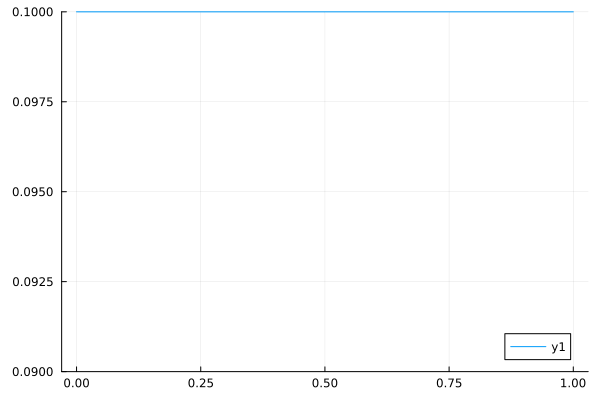

In [1]:
using Plots
dt = 0.001
Xsteps = 100
X = collect(range(0,1,length=Xsteps))
dx = 1/Xsteps
c = 10
C = c*dt/dx
C2 = C^2

#init(x) = x>0.5 ? sin(2π*x) : 0
init(x) = 0.1

f(x) = -1

function time_step(U,U_1,C2,dt,X)
    V = similar(U)
    V[begin+1:end-1] = 2*U[begin+1:end-1] - U_1[begin+1:end-1] + C2*(U[begin+2:end] - 2*U[begin+1:end-1] + U[begin:end-2]) .+ (dt^2)*f.(X[begin+1:end-1])
    V[begin]=U[begin]
    V[end]=U[end]
    return V
end
    
V_2 = init.(X)
V_1 = init.(X)

function wave_gif(V_1,V_2,C2,dt,X)
    anim = @animate for t in 1:200
        V_0 = time_step(V_1,V_2,C2,dt,X)
        plot(X,V_0,ylim = (0.09,0.1))
        V_2 = V_1
        V_1 = V_0
    end
    gif(anim,"1DString.gif",fps=40)
end

wave_gif(V_1,V_2,C2,dt,X)